In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm_api
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from scipy import stats


In [2]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/home/armsjs/anaconda3/envs/DataSciencePortfolio/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include

In [3]:
X_origin = pd.DataFrame(boston.data, columns=boston.feature_names)
X_origin.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y_origin = pd.Series(boston.target, name='MEDV')
y_origin[0:6]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
Name: MEDV, dtype: float64

In [5]:
X, X_test, y, y_test = train_test_split(X_origin, y_origin, random_state = 1)

In [6]:
df = pd.concat([X, y], axis=1)

In [7]:
X.shape

(379, 13)

In [8]:
X.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [9]:
y.isna().sum()

0

### EDA 

In [10]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.805183,11.521108,11.220053,0.081794,0.554073,6.255726,68.751451,3.824433,9.525066,405.182058,18.478100,358.304802,12.936174
std,9.375846,23.492644,6.875362,0.274413,0.117825,0.687415,28.276504,2.138449,8.734550,169.483657,2.141433,89.601791,7.243381
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.083475,0.000000,5.255000,0.000000,0.447500,5.875000,45.050000,2.094450,4.000000,277.000000,17.400000,376.125000,7.165000
50%,0.245220,0.000000,9.690000,0.000000,0.538000,6.172000,79.200000,3.317500,5.000000,329.000000,19.100000,392.040000,11.970000
75%,3.683390,17.750000,18.100000,0.000000,0.624000,6.611000,94.050000,5.108550,24.000000,666.000000,20.200000,396.220000,17.135000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [11]:
y.describe()

count    379.000000
mean      22.344591
std        8.920931
min        5.000000
25%       17.100000
50%       20.800000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [12]:
X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.195484,0.389041,-0.064685,0.403533,-0.206140,0.348293,-0.370307,0.607924,0.570912,0.282849,-0.372070,0.442998
ZN,-0.195484,1.000000,-0.544895,-0.035765,-0.520324,0.336601,-0.588529,0.700130,-0.318524,-0.312923,-0.403056,0.169418,-0.420601
INDUS,0.389041,-0.544895,1.000000,0.036735,0.768276,-0.388148,0.646452,-0.713545,0.586062,0.704795,0.387252,-0.353812,0.598079
CHAS,-0.064685,-0.035765,0.036735,1.000000,0.098402,0.101530,0.067883,-0.092186,-0.009136,-0.044917,-0.119846,0.046263,-0.047730
NOX,0.403533,-0.520324,0.768276,0.098402,1.000000,-0.325283,0.726234,-0.764939,0.608815,0.670951,0.189482,-0.388886,0.598603
RM,-0.206140,0.336601,-0.388148,0.101530,-0.325283,1.000000,-0.286281,0.248623,-0.200272,-0.267035,-0.355134,0.136416,-0.611438
AGE,0.348293,-0.588529,0.646452,0.067883,0.726234,-0.286281,1.000000,-0.752379,0.456785,0.509776,0.278642,-0.290676,0.637677
DIS,-0.370307,0.700130,-0.713545,-0.092186,-0.764939,0.248623,-0.752379,1.000000,-0.490342,-0.537312,-0.241096,0.286775,-0.510071
RAD,0.607924,-0.318524,0.586062,-0.009136,0.608815,-0.200272,0.456785,-0.490342,1.000000,0.919322,0.465916,-0.442095,0.475813
TAX,0.570912,-0.312923,0.704795,-0.044917,0.670951,-0.267035,0.509776,-0.537312,0.919322,1.000000,0.464998,-0.439585,0.525850


<AxesSubplot:>

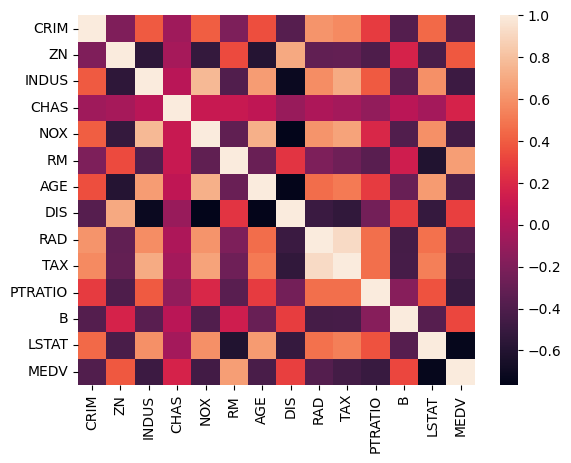

In [13]:
sns.heatmap(df.corr())

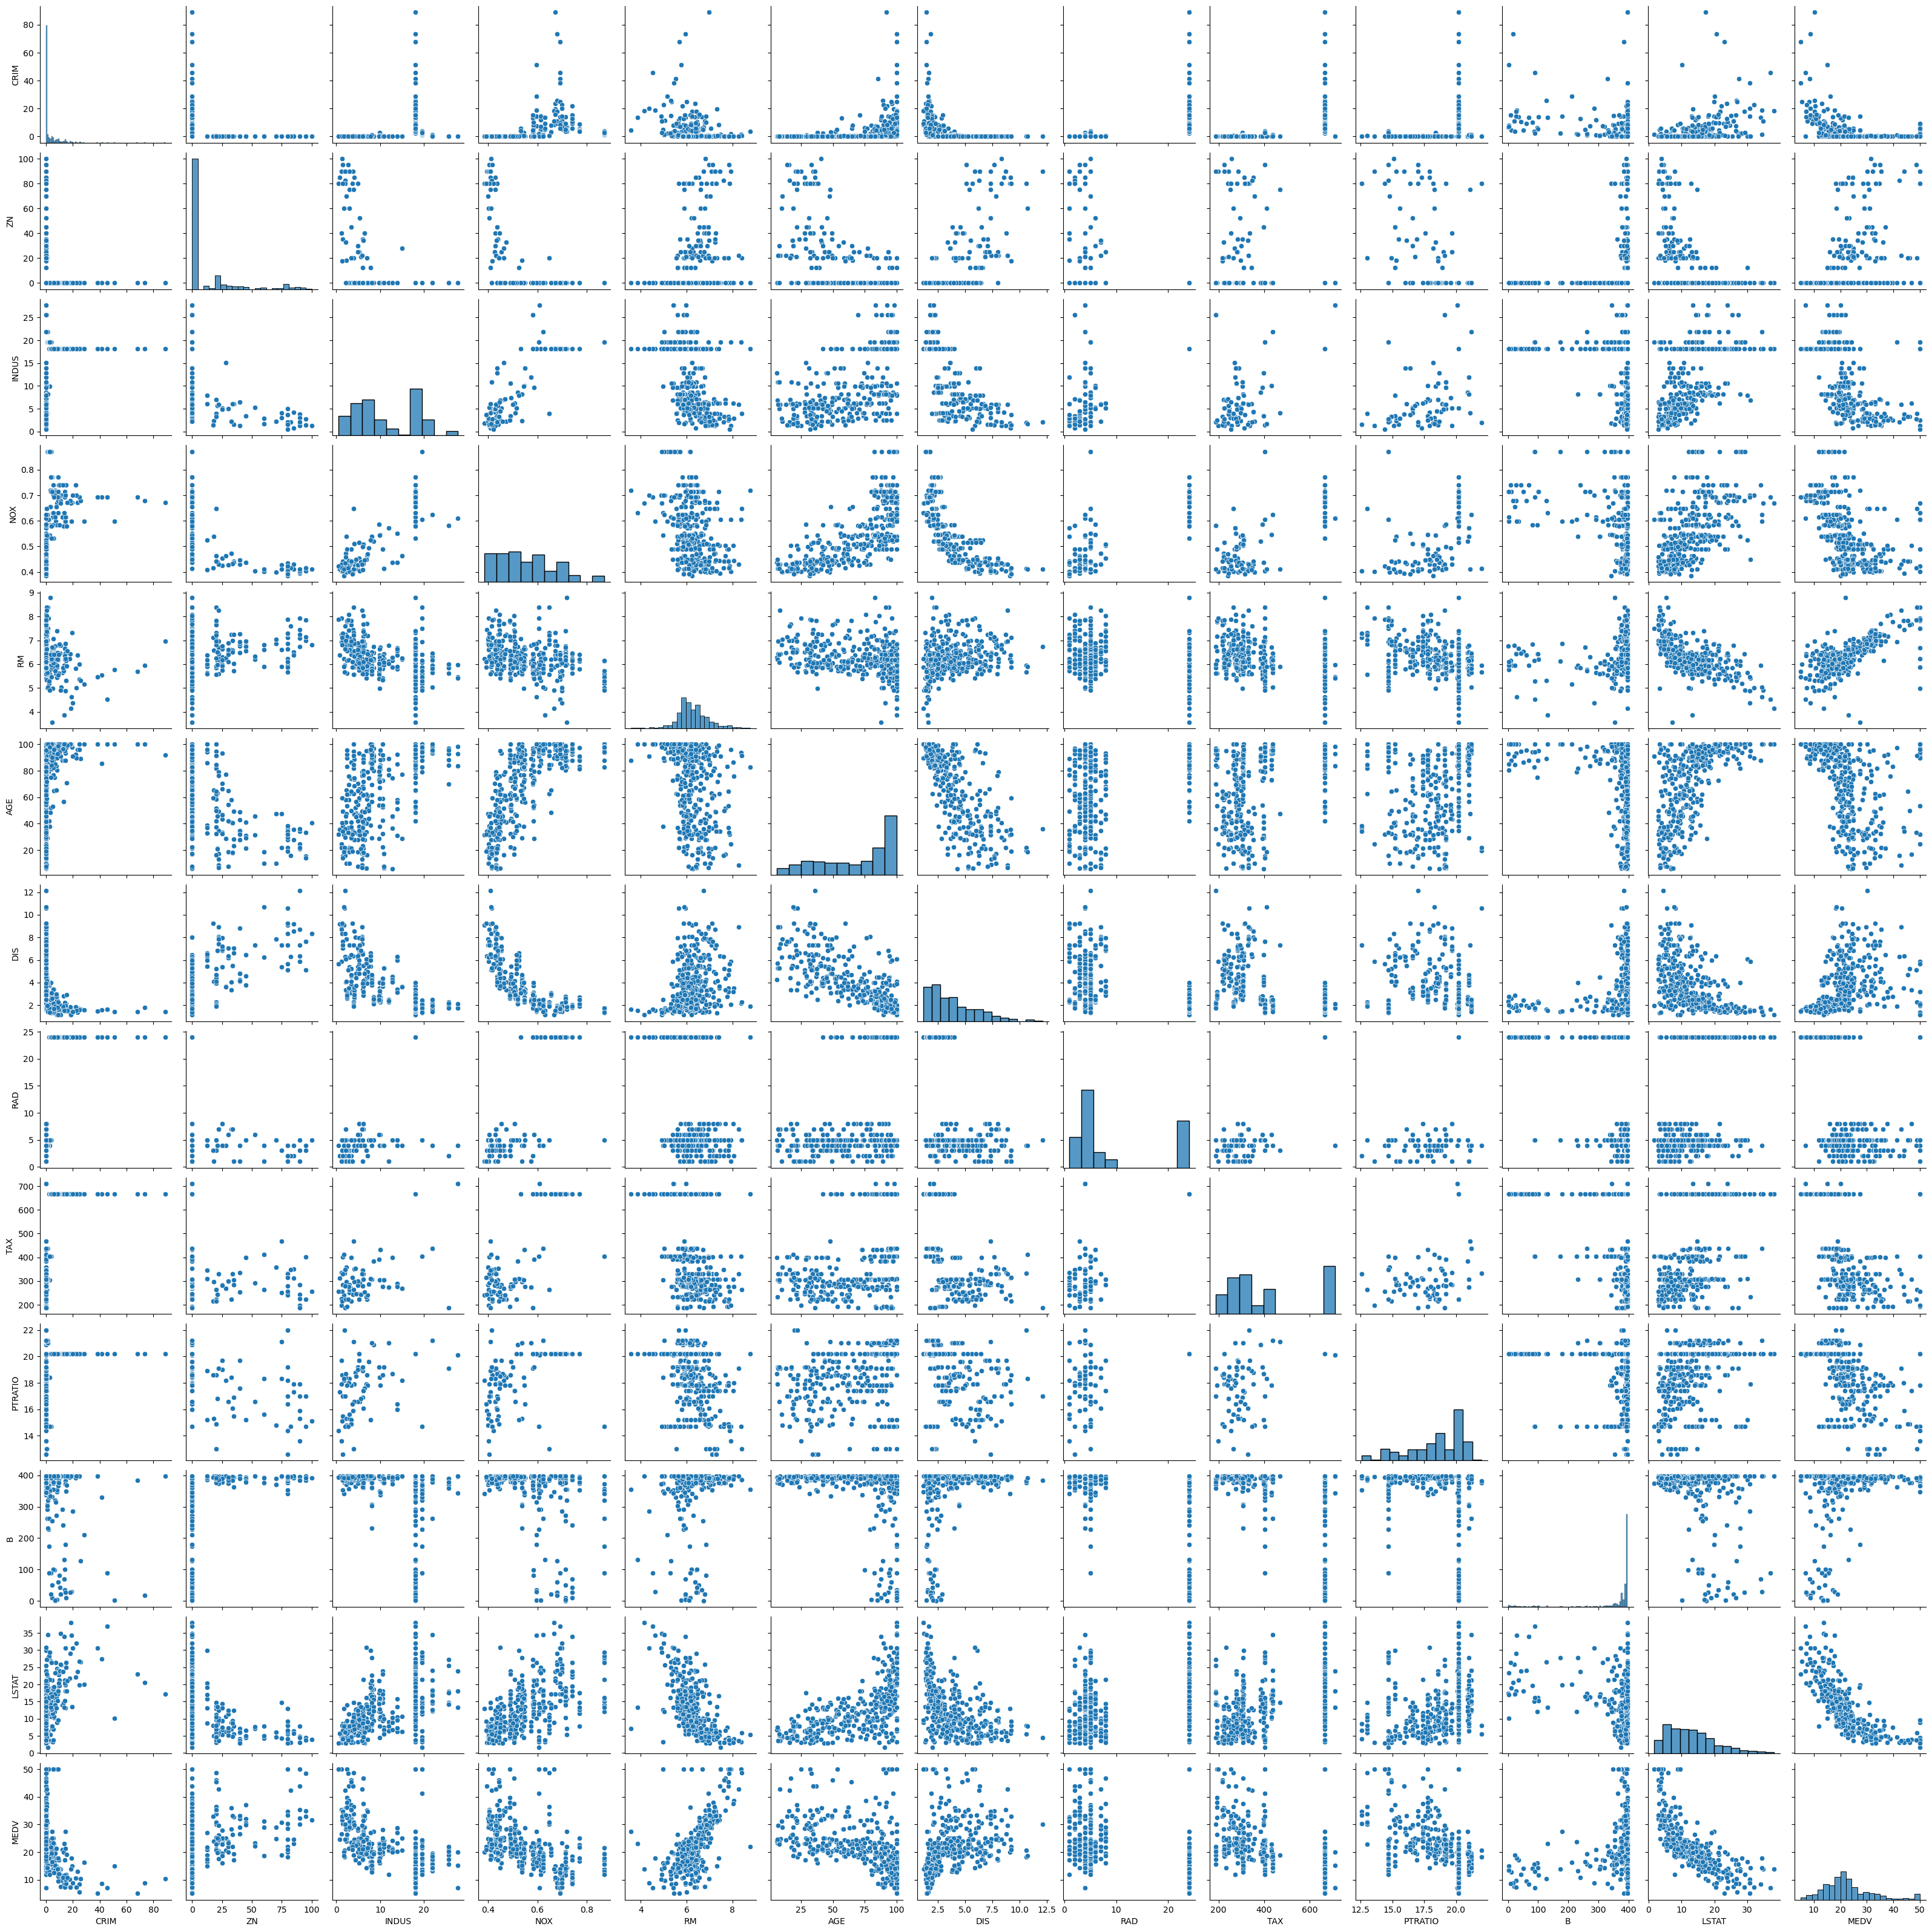

In [14]:
sns.pairplot(df.drop('CHAS', axis=1))

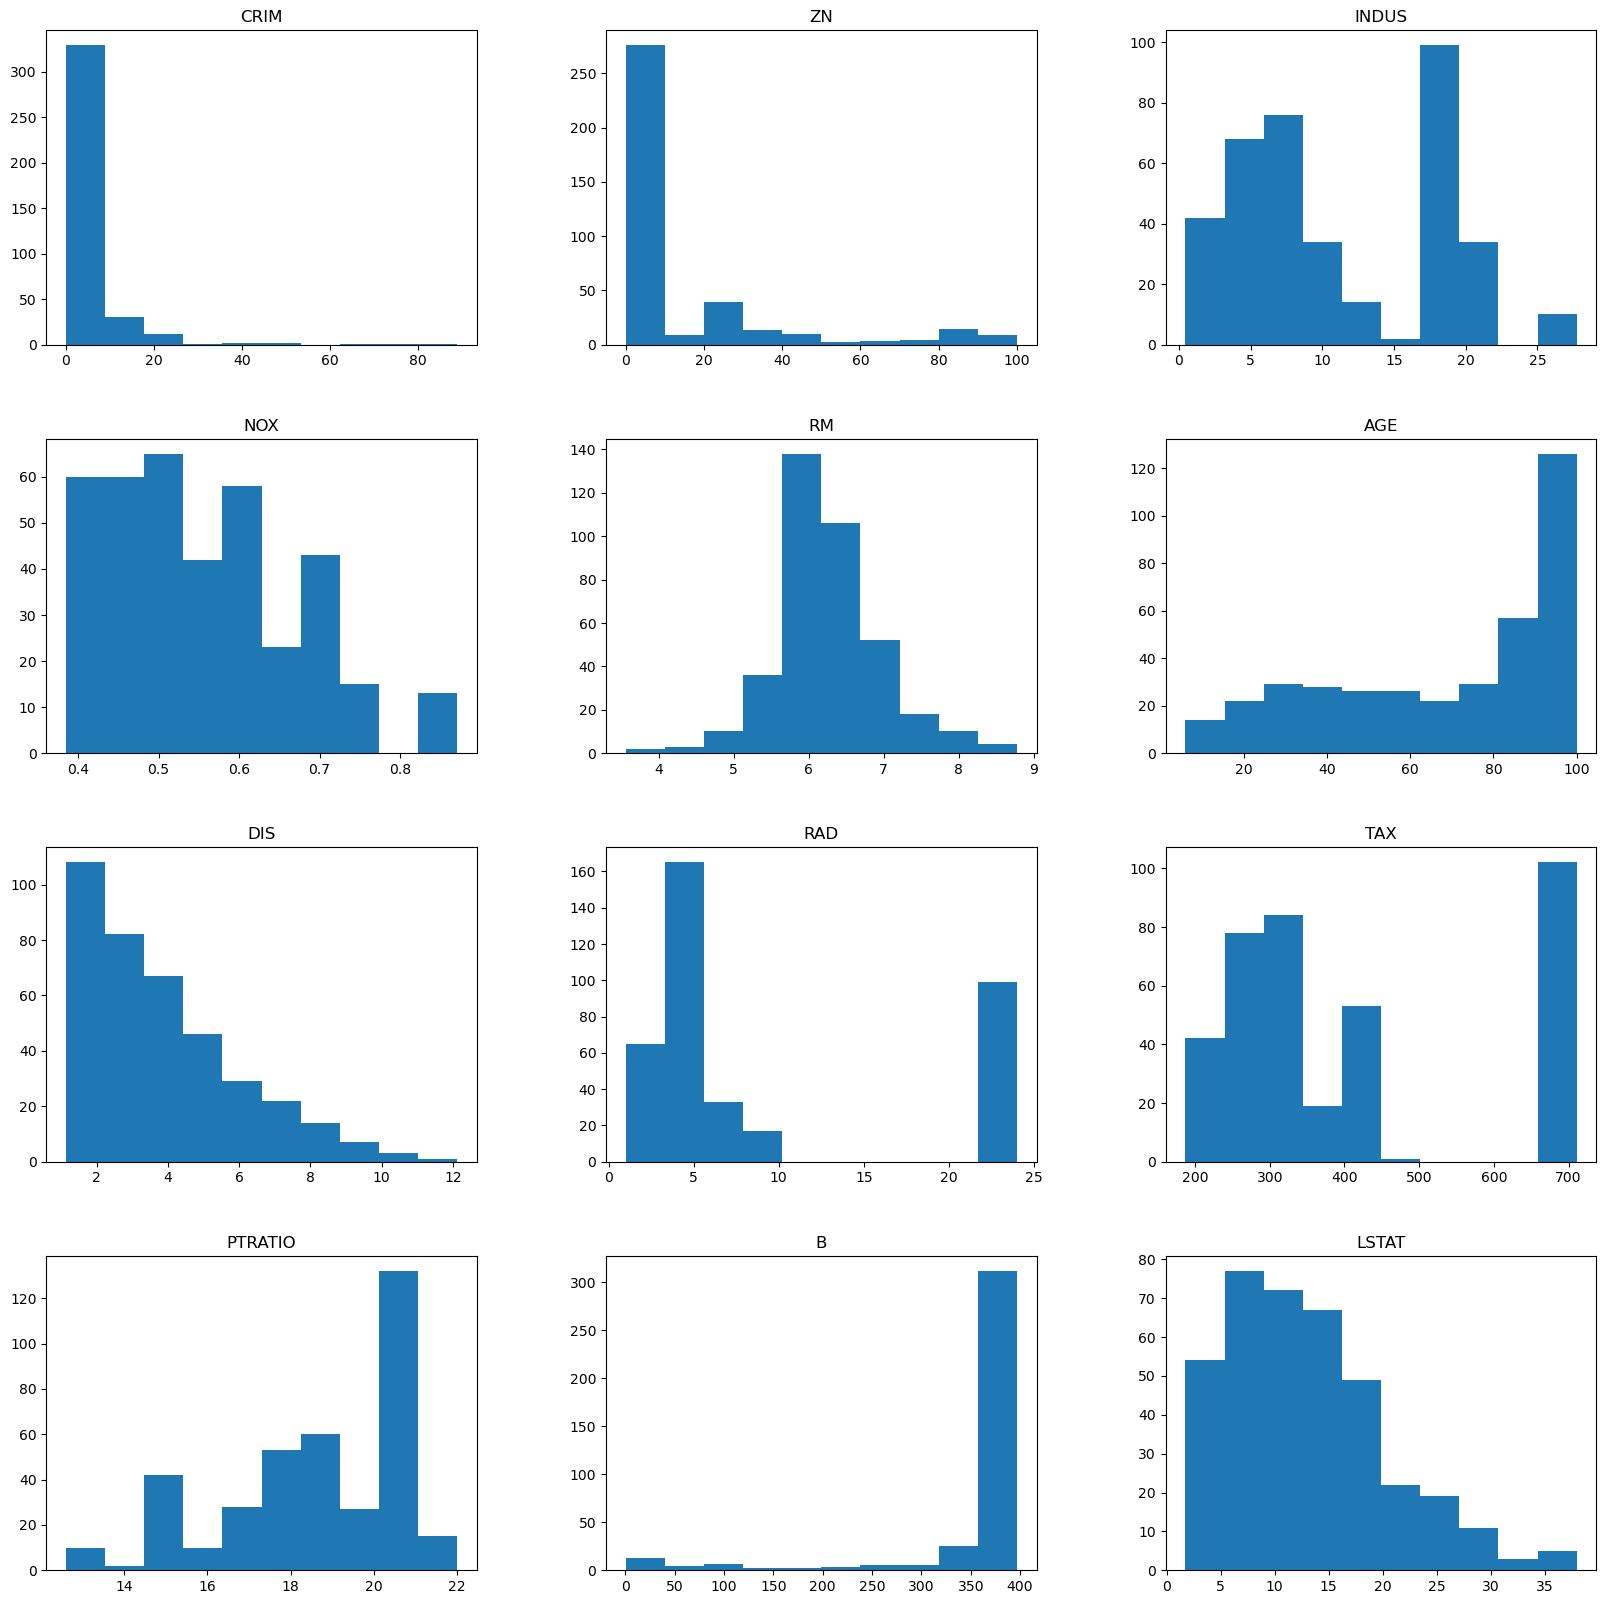

In [15]:
(df.drop(['CHAS', 'MEDV'], axis=1)).hist(figsize=(20, 20), layout=(4, 3), grid=False)
plt.show()

/tmp/ipykernel_17852/2977962349.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y[X.CHAS == 1], hist=True, label='YES')
/tmp/ipykernel_17852/2977962349.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y[X.CHAS == 0], hist=True, label='NO')


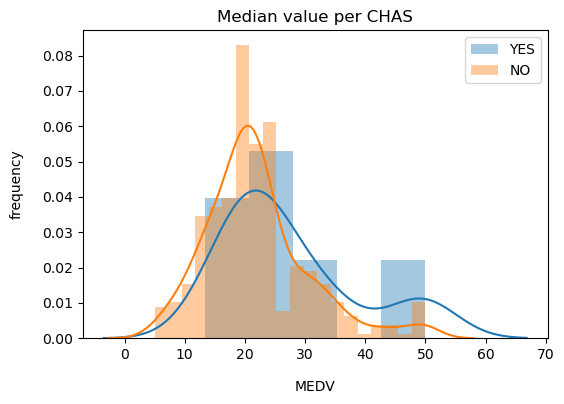

In [16]:
plt.figure(figsize=(6, 4))

sns.distplot(y[X.CHAS == 1], hist=True, label='YES')
sns.distplot(y[X.CHAS == 0], hist=True, label='NO')

plt.xlabel('MEDV', labelpad=13)
plt.ylabel('frequency', labelpad=13)

plt.title('Median value per CHAS')
plt.legend()
plt.show()

<AxesSubplot:>

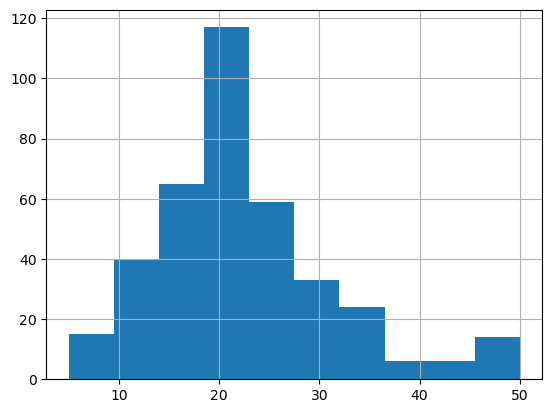

In [17]:
y.hist()

<AxesSubplot:ylabel='MEDV'>

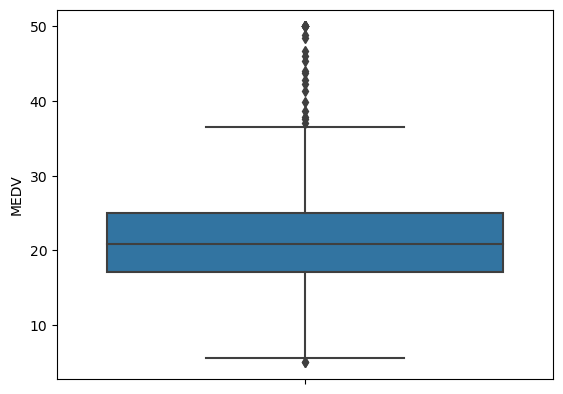

In [18]:
sns.boxplot(y = y)

### Fitting linear model

In [19]:
X_constant = sm_api.add_constant(X)

lin_reg = sm_api.OLS(y, X_constant).fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     71.07
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           1.72e-91
Time:                        01:26:52   Log-Likelihood:                -1127.6
No. Observations:                 379   AIC:                             2283.
Df Residuals:                     365   BIC:                             2338.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.1925      6.005      7.526      0.000      33.385      57.000
CRIM          -0.1144      0.035     -3.276      0.001      -0.183      -0.046
ZN             0.0571      0.017      3.332      0.001       0.023       0.091
INDUS          0.0383      0.071      0.540      0.590      -0.101       0.178
CHAS           2.4285      0.940      2.584      0.010       0.580       4.277
NOX          -21.2326      4.453     -4.768      0.000     -29.990     -12.476
RM             2.8772      0.497      5.786      0.000       1.899       3.855
AGE            0.0069      0.016      0.437      0.662      -0.024       0.038
DIS           -1.4716      0.240     -6.129      0.000      -1.944      -0.999
RAD            0.3058      0.081      3.758      0.000       0.146       0.466
TAX           -0.0107      0.005     -2.305      0.022      -0.020      -0.002
PTRATIO       -0.9961      0.159     -6.284      0.000      -1.308      -0.684
B              0.0063      0.003      1.950      0.052   -5.46e-05       0.013
LSTAT         -0.5574      0.059     -9.382      0.000      -0.674      -0.441
==============================================================================
Omnibus:                      149.481   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              669.903
Skew:                           1.668   Prob(JB):                    3.41e-146
Kurtosis:                       8.593   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Assumptions

#### LINE

**Residuales:** ***Normal( $μ = 0, σ^{2}$ )***

In [20]:
resid_val = lin_reg.resid
fitted_val = lin_reg.predict()

lin_reg.resid.mean()

3.6605136980780887e-14

### Normality of residuals and Shapiro-Wilk test

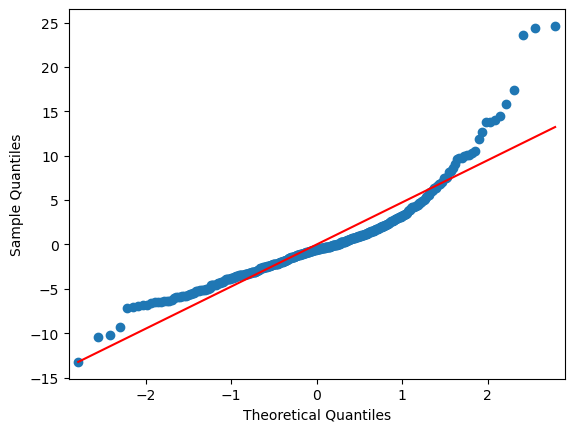

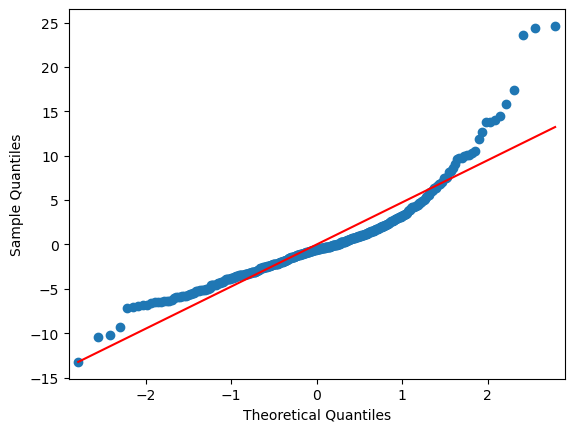

In [21]:
sm_api.qqplot(resid_val, line='s')

In [22]:
stats.shapiro(lin_reg.resid)

ShapiroResult(statistic=0.8845530152320862, pvalue=2.8585940542668025e-16)

### Linearity in model

Text(0.5, 1.0, 'Fitted vrs observed')

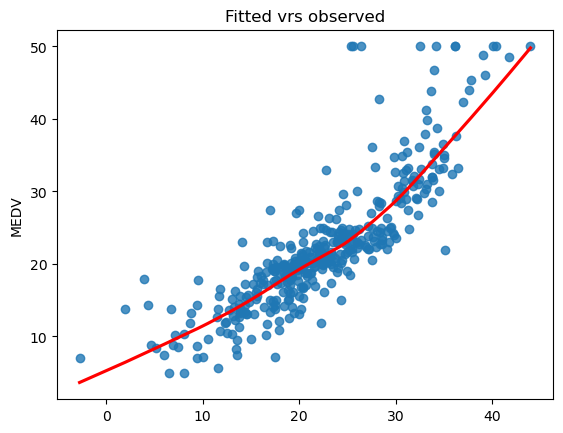

In [23]:
sns.regplot(x=fitted_val, y=y, lowess=True, line_kws={'color': 'red'})
plt.title('Fitted vrs observed')


### Homocedasticity: Equality of variances

Text(0.5, 1.0, 'Fitted vrs residual')

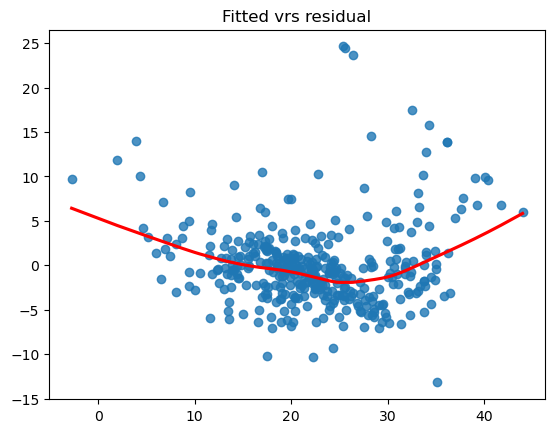

In [24]:
sns.regplot(x=fitted_val, y=resid_val, lowess=True, line_kws={'color': 'red'})
plt.title('Fitted vrs residual')

Text(0.5, 1.0, 'Fitted vrs Residual')

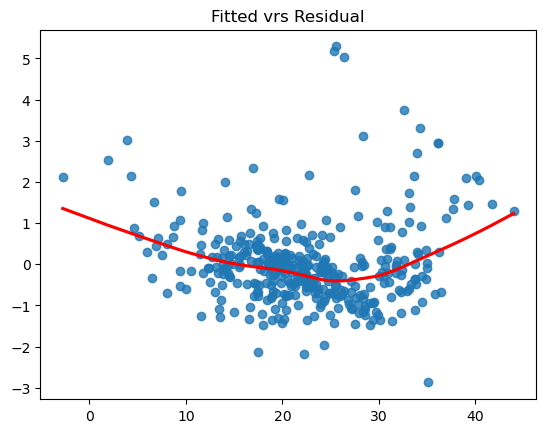

In [25]:
resid_stand = lin_reg.get_influence().resid_studentized_internal

sns.regplot(x=fitted_val, y=resid_stand, lowess=True, line_kws={'color': 'red'})

plt.title('Fitted vrs Residual')